
# WebCrawlingReport

## 1. Choosing a Topic
* Check random league of legend user's records and analyse it.
    

## 2. Data Collection
* https://your.gg/kr/profile/...
* Crawl the any league of legend user's solo rank records when be inputed the any user's name.
* Match result, Carry rate, Team luck, Laningphase rate, KDA, CS, KP
* Using selenium and BeautifulSoup

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## 3. Realiztion

In [2]:
# Input any User's name. ex) 페르뮴
Name = input('소환사명을 입력하세요.')

driver_path = 'C:\\JupyterLab\\chromedriver.exe'
driver = webdriver.Chrome(driver_path)

# Open website with selenium driver
driver.get("https://your.gg/")
print(driver.title)

# Search the textbox, that should be inputed the User's name and input User's
time.sleep(2)
search = "summonerNameText"
elem = driver.find_element_by_id(search)
elem.clear()
elem.send_keys(Name)
time.sleep(2)
elem.send_keys(Keys.RETURN)

# Click the search button to get result
time.sleep(2)
driver.find_element_by_id('matchCategory').click()

# Get solo rank result
time.sleep(2)
solorank = 'body > div > div.container-fluid.page-body-wrapper > div > div > div.row.dropdown > div.col-12.col-lg-2.show > div > a:nth-child(3)'
driver.find_element_by_css_selector(solorank).click()
time.sleep(2)
html = driver.page_source
driver.close()
html

소환사명을 입력하세요. 페르뮴


승리를 돕는 AI 롤 전적 검색 유어지지


'<html lang="ko"><head>\n    \n\n\n<!--Profile-->\n<title>페르뮴 (솔로랭크 Silver 3 53.3%) | 승리를 돕는 AI 롤 전적 검색 유어지지</title>\n<meta charset="utf-8">\n<meta name="page" content="Profile">\n<meta name="google-play-app" content="app-id=com.ggtics.app.lol">\n<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n<meta name="format-detection" content="telephone=no">\n<meta name="naver-site-verification" content="fc4b36d1c918a97213240ce27b5f84c843cf91a0">\n<style data-tippy-stylesheet="">.tippy-box[data-animation=fade][data-state=hidden]{opacity:0}[data-tippy-root]{max-width:calc(100vw - 10px)}.tippy-box{position:relative;background-color:#333;color:#fff;border-radius:4px;font-size:14px;line-height:1.4;outline:0;transition-property:transform,visibility,opacity}.tippy-box[data-placement^=top]>.tippy-arrow{bottom:0}.tippy-box[data-placement^=top]>.tippy-arrow:before{bottom:-7px;left:0;border-width:8px 8px 0;border-top-color:initial;transform-origin:center top}.tippy-bo

### 3-1. Crawl the match result

In [3]:
soup = BeautifulSoup(html)
records = soup.select('.gg-matchlist .mt-1:not(.text-small)')

match_result = []
for record in records:
    match_result.append(record.get_text().strip())
    
match_result

['패배',
 '패배',
 '승리',
 '패배',
 '패배',
 '승리',
 '다시',
 '승리',
 '승리',
 '패배',
 '패배',
 '승리',
 '패배',
 '패배',
 '승리',
 '패배',
 '승리',
 '패배',
 '승리',
 '패배',
 '승리',
 '승리',
 '승리',
 '패배',
 '패배',
 '패배',
 '승리',
 '패배',
 '패배',
 '패배']

### 3-2. Crawl the selected Champion

In [4]:
records = soup.select('.rounded-circle.gg-matchlist-champion')

champion = []
for record in records:
    champion.append(" ".join(record['alt'].split()[1:]))
    
champion

['아칼리',
 '아칼리',
 '야스오',
 '아칼리',
 '야스오',
 '아칼리',
 '아칼리',
 '아칼리',
 '아칼리',
 '아칼리',
 '말파이트',
 '요네',
 '쉔',
 '릴리아',
 '비에고',
 '사일러스',
 '아칼리',
 '이즈리얼',
 '야스오',
 '비에고',
 '오른',
 '이렐리아',
 '사일러스',
 '사일러스',
 '레넥톤',
 '사일러스',
 '말파이트',
 '탈론',
 '제드',
 '야스오']

### 3-3. Crawl the Carry rate (인분)

In [5]:
records = soup.select('[data-event="move_to_match matchlist_contribution"]')

inbun = []
for record in records:
    inbun.append(float(record.get_text().strip()))
                 
inbun

[0.9,
 1.3,
 1.1,
 0.7,
 0.5,
 1.3,
 1.3,
 1.1,
 1.5,
 0.8,
 1.1,
 1.7,
 0.7,
 0.6,
 0.9,
 0.6,
 1.5,
 1.2,
 1.0,
 0.9,
 1.6,
 1.0,
 2.0,
 0.9,
 0.7,
 0.7,
 1.3,
 0.7,
 0.6,
 0.8]

### 3-4. Crawl the Team luck

In [6]:
records = soup.select('[data-event="move_to_teamluck matchlist_teamluck"]')

team_luck = []
for record in records:
    team_luck.append(record.get_text().strip())
    
team_luck

['보통',
 '최고',
 '최고',
 '나쁨',
 '나쁨',
 '좋음',
 '최고',
 '좋음',
 '좋음',
 '나쁨',
 '극악',
 '보통',
 '보통',
 '보통',
 '최고',
 '나쁨',
 '좋음',
 '나쁨',
 '좋음',
 '극악',
 '나쁨',
 '보통',
 '나쁨',
 '나쁨',
 '보통',
 '보통',
 '좋음',
 '보통',
 '좋음',
 '보통']

### 3-5. Crawl the laningphase rate (라인전 승률)

In [7]:
records = soup.select('[data-event="move_to_match matchlist_laningphase"]')

laningphase = []

for record in records:
    laningphase.append(record.get_text().strip())
    
laningphase

['4:6',
 '6:4',
 '8:2',
 '4:6',
 '1:9',
 '4:6',
 '2:8',
 '2:8',
 '7:3',
 '8:2',
 '7:3',
 '8:2',
 '2:8',
 '1:9',
 '4:6',
 '4:6',
 '5:5',
 '7:3',
 '9:1',
 '6:4',
 '7:3',
 '6:4',
 '8:2',
 '5:5',
 '3:7',
 '1:9',
 '6:4',
 '2:8',
 '4:6',
 '5:5']

### 3-6. Crawl the KDA, CS, KP

In [8]:
records = soup.select('.d-flex.gg-sub-description.justify-content-between')

temp = 0
KDA = []
KDA_one = ""
CS = []
CSpM = []
KP = []

# 'records' get elements that nave class named d-flex.gg-sub-description.justify-content-between and KDA, CS, KP is all in it.
# It should be seperated by three lists
for record in records:
    if temp % 3 == 0:
        for KDA_state in record.find_all('span'):
            # To merge the result lick 'kill' + '/' + 'death' + '/' + 'assist'
            KDA_one += KDA_state.get_text()
        KDA.append(KDA_one)
        KDA_one = ""
    elif temp % 3 == 1:
        CS.append(int(record.find(class_ = 'text-info').get_text().split('(')[0]))
        CSpM.append(float(record.find(class_ = 'text-info').get_text().split('(')[1][:-1]))
    else:
        KP.append(int(record.find(class_ = 'text-info').get_text()[:-1])/100)
    temp += 1


KDA, CS, CSpM, KP

(['7/5/5',
  '7/3/11',
  '5/4/8',
  '1/3/1',
  '1/7/0',
  '9/2/11',
  '0/0/2',
  '10/6/10',
  '8/0/5',
  '3/5/7',
  '9/9/14',
  '12/1/7',
  '1/4/3',
  '6/11/5',
  '2/1/4',
  '2/7/5',
  '6/0/6',
  '9/8/10',
  '3/2/0',
  '2/3/0',
  '7/2/16',
  '6/9/15',
  '18/2/4',
  '7/8/4',
  '2/8/7',
  '2/7/2',
  '6/0/4',
  '2/6/6',
  '8/11/2',
  '6/7/4'],
 [147,
  188,
  154,
  95,
  119,
  114,
  5,
  194,
  161,
  163,
  177,
  164,
  122,
  140,
  228,
  116,
  117,
  213,
  112,
  130,
  288,
  281,
  146,
  169,
  126,
  94,
  109,
  104,
  148,
  206],
 [4.7,
  5.1,
  5.7,
  5.6,
  5.4,
  4.8,
  1.3,
  5.1,
  5.8,
  5.6,
  5.1,
  6.6,
  5.1,
  3.8,
  7.1,
  5.3,
  5.6,
  6.1,
  6.2,
  5.9,
  6.5,
  6.7,
  5.8,
  5.1,
  4.5,
  4.3,
  5.2,
  4.0,
  4.1,
  6.4],
 [0.43,
  0.45,
  0.33,
  0.17,
  0.11,
  0.53,
  0.67,
  0.5,
  0.37,
  0.43,
  0.74,
  0.61,
  0.44,
  0.37,
  0.13,
  0.54,
  0.35,
  0.5,
  0.21,
  0.33,
  0.62,
  0.48,
  0.49,
  0.48,
  0.41,
  0.36,
  0.42,
  0.36,
  0.31,
  0.36])

## 4. Make the DataFrame

In [9]:
df_data = {
    '결과':match_result, '챔피언':champion, '인분':inbun, '팀운':team_luck, '라인전':laningphase, 'KDA':KDA, 'CS':CS, '분당CS':CSpM, '킬 관여율':KP
}
df = pd.DataFrame(data = df_data)
df.reset_index(inplace = True)
df

,index,결과,챔피언,인분,팀운,라인전,KDA,CS,분당CS,킬 관여율
0,0,패배,아칼리,0.9,보통,4:6,7/5/5,147,4.7,0.43
1,1,패배,아칼리,1.3,최고,6:4,7/3/11,188,5.1,0.45
2,2,승리,야스오,1.1,최고,8:2,5/4/8,154,5.7,0.33
3,3,패배,아칼리,0.7,나쁨,4:6,1/3/1,95,5.6,0.17
4,4,패배,야스오,0.5,나쁨,1:9,1/7/0,119,5.4,0.11
5,5,승리,아칼리,1.3,좋음,4:6,9/2/11,114,4.8,0.53
6,6,다시,아칼리,1.3,최고,2:8,0/0/2,5,1.3,0.67
7,7,승리,아칼리,1.1,좋음,2:8,10/6/10,194,5.1,0.50
8,8,승리,아칼리,1.5,좋음,7:3,8/0/5,161,5.8,0.37
9,9,패배,아칼리,0.8,나쁨,8:2,3/5/7,163,5.6,0.43


## 5. Analyse

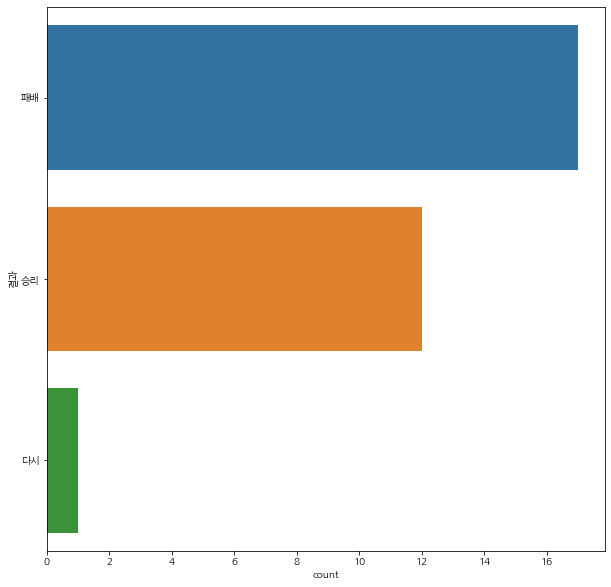

(None, 0.4)

In [10]:
# Analyse '결과' column and get victory rate
plt.figure(figsize = (10, 10))
index = range(1, len(match_result)+1)
sns.countplot(y = '결과', data = df)
plt.show(),  match_result.count('승리') / len(match_result)

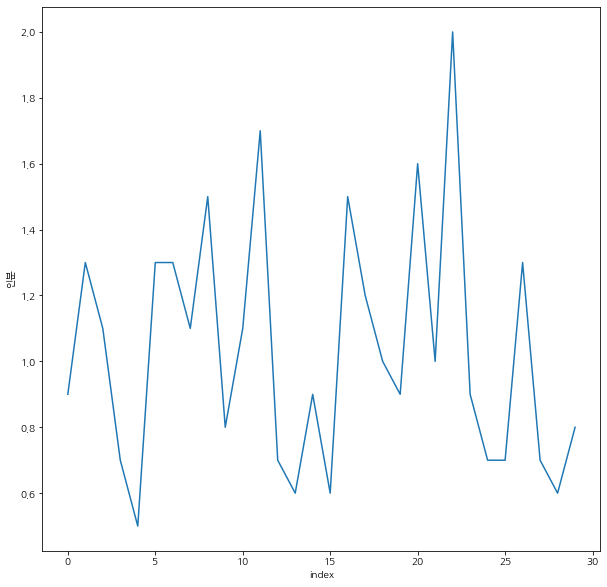

(None, 1.0333333333333332)

In [11]:
# Analyse '인분' column 
plt.figure(figsize = (10, 10))
index = range(1, len(inbun)+1)
sns.lineplot(x = 'index', y = '인분', data = df)
plt.show(), df['인분'].mean()

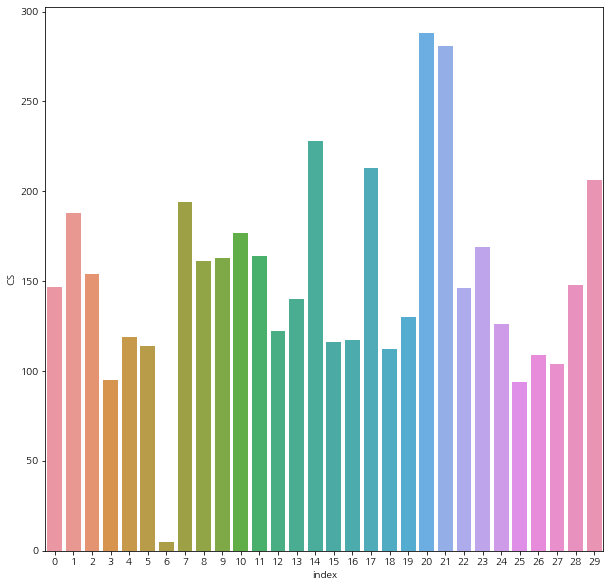

(None, 151.0)

In [12]:
# Analyse 'CS' column
plt.figure(figsize = (10, 10))
index = range(1, len(CS)+1)
sns.barplot(x = 'index', y = 'CS', data = df)
plt.show(), df['CS'].mean()

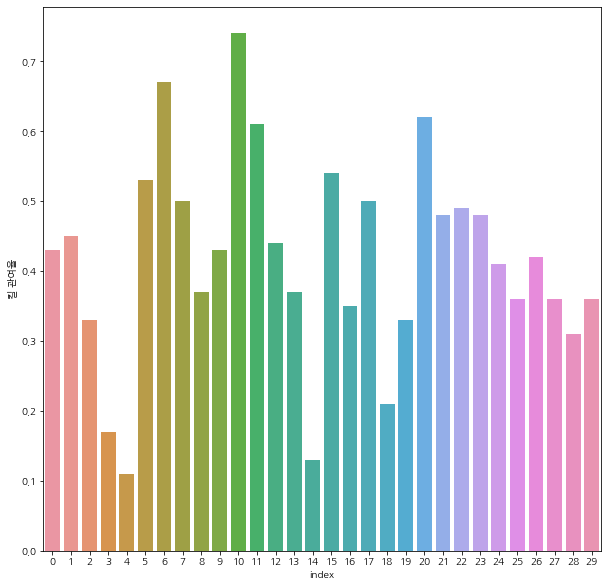

(None, 0.4166666666666667)

In [13]:
# Anaylse '킬 관여율' column 
plt.figure(figsize = (10, 10))
index = range(1, len(KP)+1)
sns.barplot(x = 'index', y = '킬 관여율', data = df)
plt.show(), df['킬 관여율'].mean()